In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("data/claims_train.csv")
test = pd.read_csv("data/claims_test.csv")

In [4]:
train["ClaimRate"] = train["ClaimNb"] / train["Exposure"]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542410 entries, 0 to 542409
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       542410 non-null  float64
 1   ClaimNb     542410 non-null  int64  
 2   Exposure    542410 non-null  float64
 3   Area        542410 non-null  object 
 4   VehPower    542410 non-null  int64  
 5   VehAge      542410 non-null  int64  
 6   DrivAge     542410 non-null  int64  
 7   BonusMalus  542410 non-null  int64  
 8   VehBrand    542410 non-null  object 
 9   VehGas      542410 non-null  object 
 10  Density     542410 non-null  int64  
 11  Region      542410 non-null  object 
 12  ClaimRate   542410 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 53.8+ MB


In [80]:
train.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimRate
count,5.414160e+05,541416.00000,541416.000000,541416.000000,541416.000000,541416.000000,541416.000000,541416.000000,541416.000000
mean,2.625462e+06,0.05314,0.527763,6.452726,7.043473,45.502983,59.766195,1795.926642,0.261601
std,1.642401e+06,0.23883,0.363861,2.050219,5.659153,14.137967,15.645146,3966.464847,4.432165
min,1.000000e+00,0.00000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000
25%,1.157748e+06,0.00000,0.170000,5.000000,2.000000,34.000000,50.000000,91.000000,0.000000
50%,2.273010e+06,0.00000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000
75%,4.047446e+06,0.00000,0.990000,7.000000,11.000000,55.000000,64.000000,1662.000000,0.000000
max,6.114330e+06,11.00000,1.000000,15.000000,100.000000,100.000000,230.000000,27000.000000,732.000000


In [6]:
invalid_rows = train[(train["Exposure"] > 1) | (train["Exposure"] == 0)]
print(f"Removed rows where exposure over 1 or equal to 0: {len(invalid_rows)}")
train = train[(train["Exposure"] <= 1) & (train["Exposure"] > 0)]

Removed rows where exposure over 1 or equal to 0: 994


<Axes: xlabel='ClaimNb', ylabel='Count'>

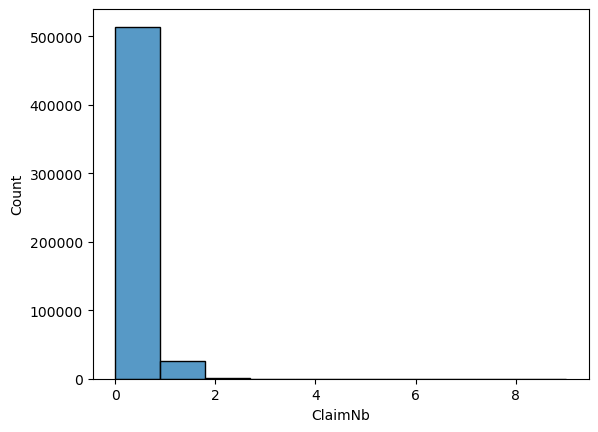

In [63]:
train_1=train[train["ClaimNb"]<10]
sns.histplot(train_1["ClaimNb"], bins=10)

<Axes: xlabel='ClaimRate', ylabel='Count'>

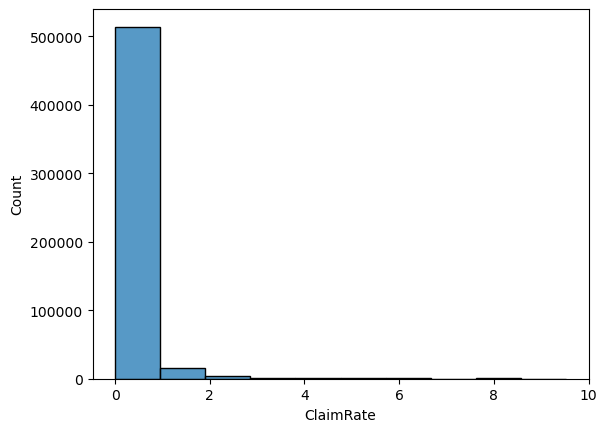

In [83]:
sns.histplot(train_1["ClaimRate"], bins=10)

/var/folders/tf/7fzgzx6j6p7dlmgznhxvzgn80000gn/T/ipykernel_1151/2342716338.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="VehGas", y="ClaimNb", data=train, estimator="mean", ci=None, errorbar=None)


<Axes: xlabel='VehGas', ylabel='ClaimNb'>

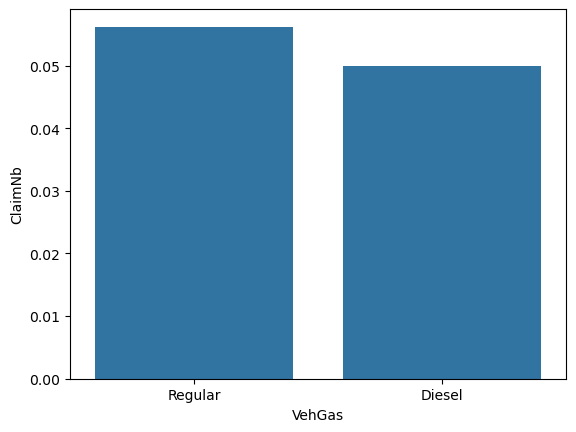

In [45]:
sns.barplot(x="VehGas", y="ClaimNb", data=train, estimator="mean", ci=None, errorbar=None)

Text(0.5, 1.0, 'Distribution of Exposure (Time at Risk)')

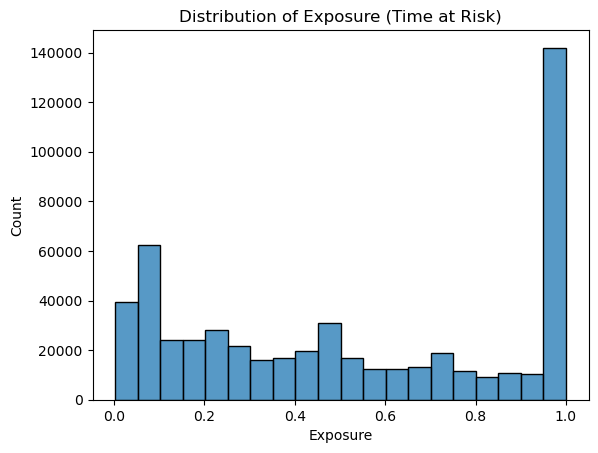

In [64]:
sns.histplot(train["Exposure"], bins=20)
plt.title("Distribution of Exposure (Time at Risk)")

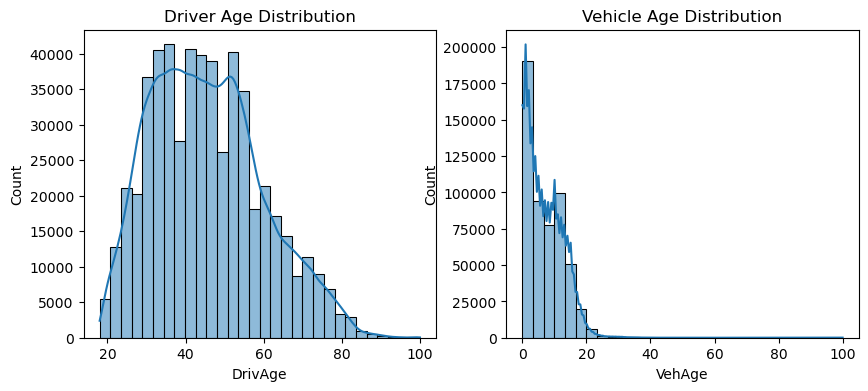

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(train["DrivAge"], bins=30, ax=axes[0], kde=True)
axes[0].set_title("Driver Age Distribution")

sns.histplot(train["VehAge"], bins=30, ax=axes[1], kde=True)
axes[1].set_title("Vehicle Age Distribution")
plt.show()

/var/folders/tf/7fzgzx6j6p7dlmgznhxvzgn80000gn/T/ipykernel_1151/1528120941.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Area", y="ClaimRate", data=train, estimator="mean", ci=None, order=order)


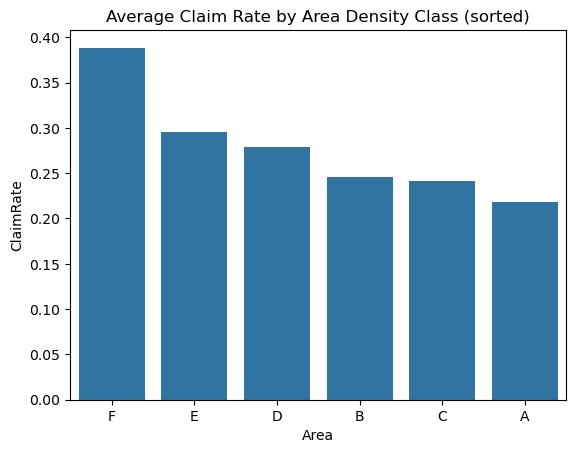

In [85]:
order = train.groupby("Area")["ClaimRate"].mean().sort_values(ascending=False).index

sns.barplot(x="Area", y="ClaimRate", data=train, estimator="mean", ci=None, order=order)
plt.title("Average Claim Rate by Area Density Class (sorted)")
plt.show()

/var/folders/tf/7fzgzx6j6p7dlmgznhxvzgn80000gn/T/ipykernel_1151/2189938609.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="ClaimRate", data=train, estimator="mean", ci=None, order=order)


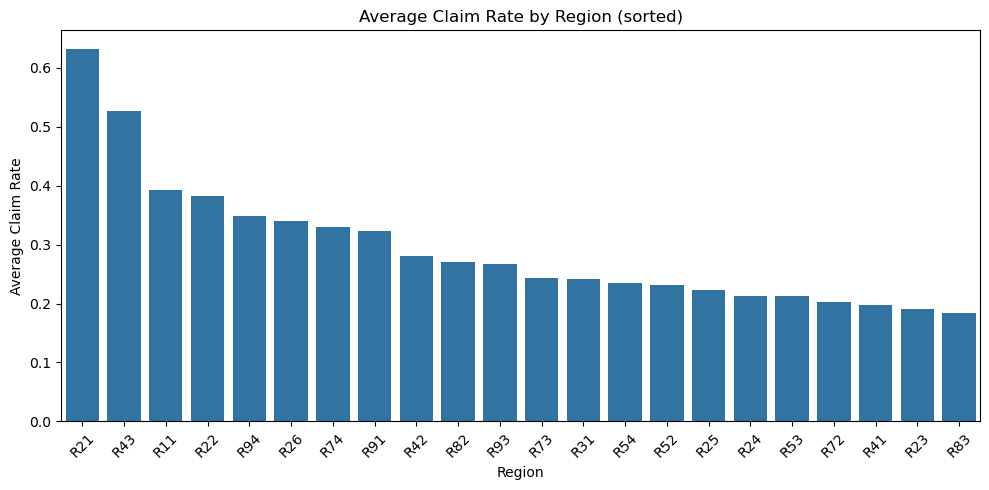

In [86]:

order = train.groupby("Region")["ClaimRate"].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
sns.barplot(x="Region", y="ClaimRate", data=train, estimator="mean", ci=None, order=order)
plt.title("Average Claim Rate by Region (sorted)")
plt.ylabel("Average Claim Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


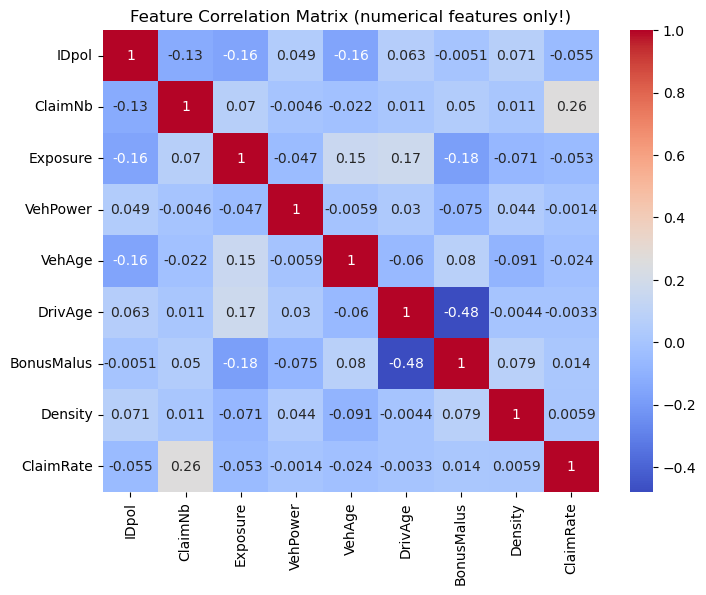

In [88]:
numeric = train.select_dtypes(include=np.number)
corr = numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix (numerical features only!)")
plt.show()


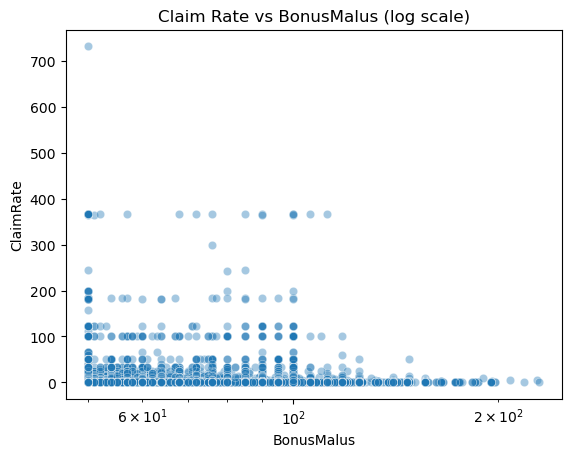

In [92]:
sns.scatterplot(x="BonusMalus", y="ClaimRate", data=train, alpha=0.4)
plt.xscale("log")
plt.title("Claim Rate vs BonusMalus (log scale)")
plt.show()


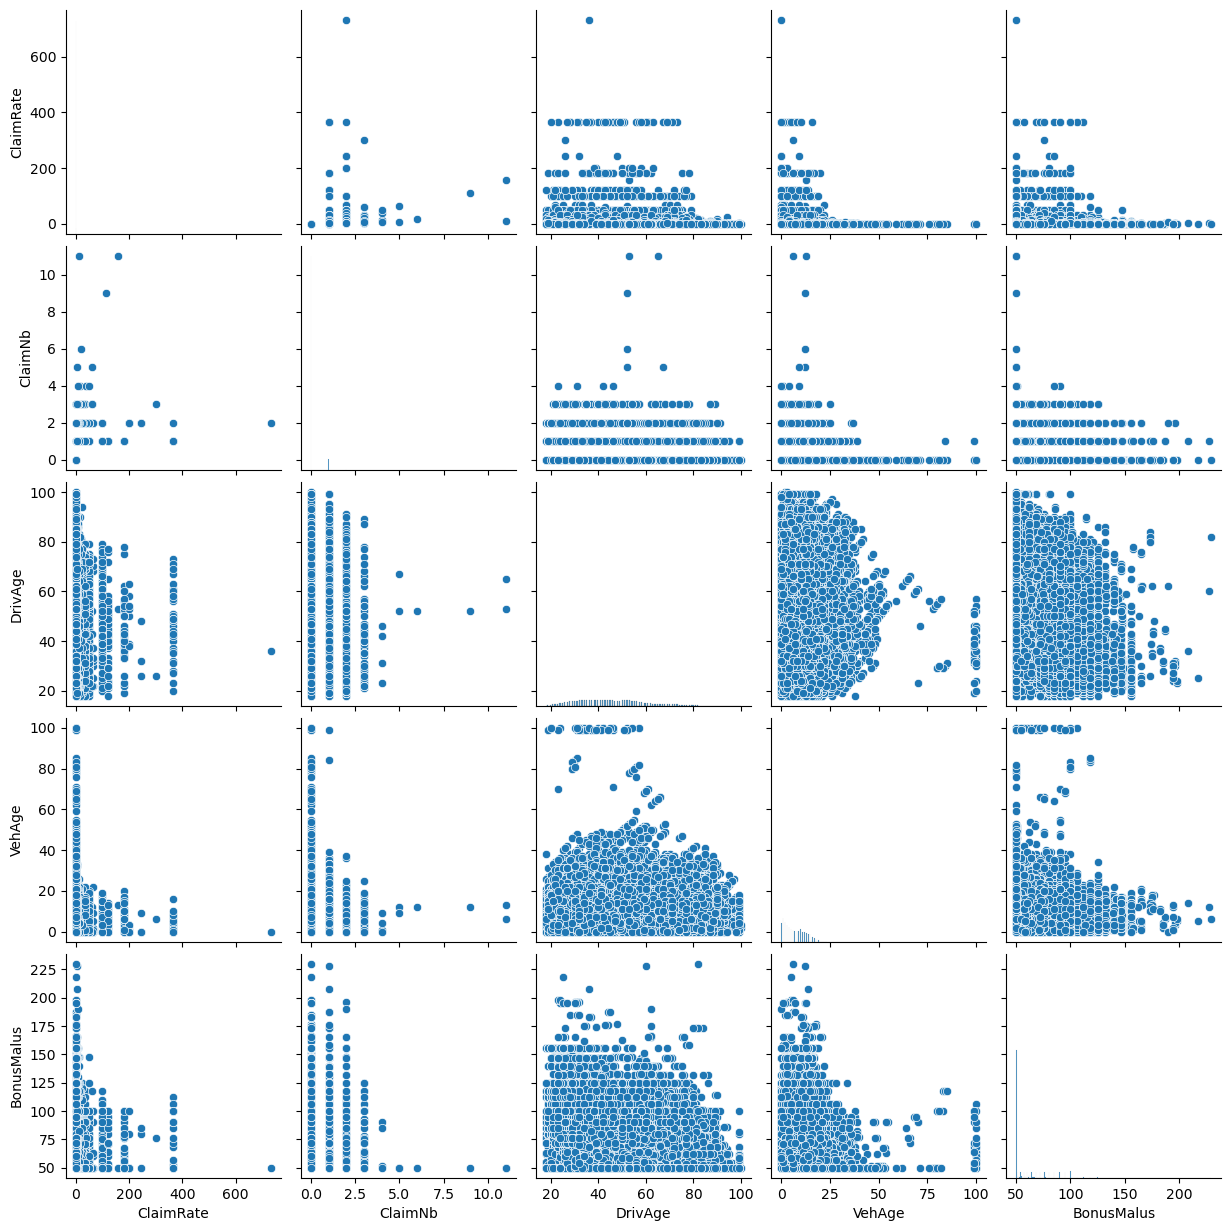

In [111]:
sns.pairplot(train[["ClaimRate", "ClaimNb", "DrivAge", "VehAge", "BonusMalus"]])

In [7]:
loadings = pd.DataFrame(pca.components_.T, index=features, columns=['PC1', 'PC2'])
print(loadings)

NameError: name 'pca' is not defined

NameError: name 'pca_df' is not defined

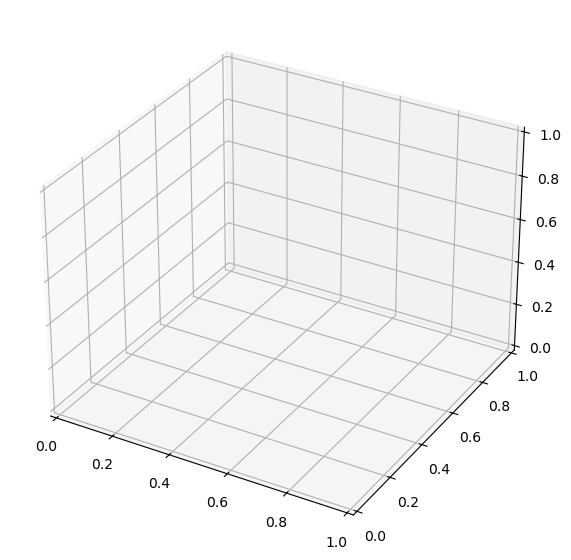

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting

# --- 3D scatter plot of PC1, PC2, PC3 ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# scatter in 3D
p = ax.scatter(
    pca_df["PC1"], 
    pca_df["PC2"], 
    pca_df["PC3"], 
    c=pca_df["ClaimNb"], 
    cmap="viridis", 
    alpha=0.7
)

# axis labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization colored by Claim Count")

# add colorbar for ClaimNb
fig.colorbar(p, ax=ax, label="ClaimNb")

plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Standardize features (mean=0, std=1) ---
X_scaled = StandardScaler().fit_transform(sample[features])

# --- Fit PCA using all components ---
pca = PCA().fit(X_scaled)

# --- Explained variance ratios ---
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var) + 1)

# --- Create line plots with dots (like slides) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: individual explained variance (scree)
axes[0].plot(components, explained_var, marker='o', linestyle='-', color='royalblue')
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Proportion of Variance Explained")
axes[0].set_title("Scree Plot (Individual Variance)")
axes[0].set_xticks(components)

# Right: cumulative explained variance
axes[1].plot(components, cum_var, marker='o', linestyle='-', color='orange')
axes[1].set_xlabel("Principal Component")
axes[1].set_ylabel("Cumulative Proportion of Variance Explained")
axes[1].set_title("Cumulative Explained Variance")
axes[1].set_ylim(0, 1.05)
axes[1].set_xticks(components)

plt.tight_layout()
plt.show()

# --- Optional: print explained variance ratios ---
for i, (ev, cv) in enumerate(zip(explained_var, cum_var), 1):
    print(f"PC{i}: {ev:.3f} (Cumulative: {cv:.3f})")
    
    
print("The elbow rule: Choose the # of PC where the line bends horizontol (like an elbow)")

NameError: name 'sample' is not defined

In [1]:
loadings = pd.DataFrame(pca.components_.T, index=features, columns=["PC1", "PC2"])
print(loadings.round(3))

plt.figure(figsize=(6,6))
plt.scatter(pca.components_[0], pca.components_[1])
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0,i]*1.5, pca.components_[1,i]*1.5,
              color='r', alpha=0.7, head_width=0.03)
    plt.text(pca.components_[0,i]*1.6, pca.components_[1,i]*1.6, feature, fontsize=10)
plt.title("Feature Loadings on PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


NameError: name 'pd' is not defined

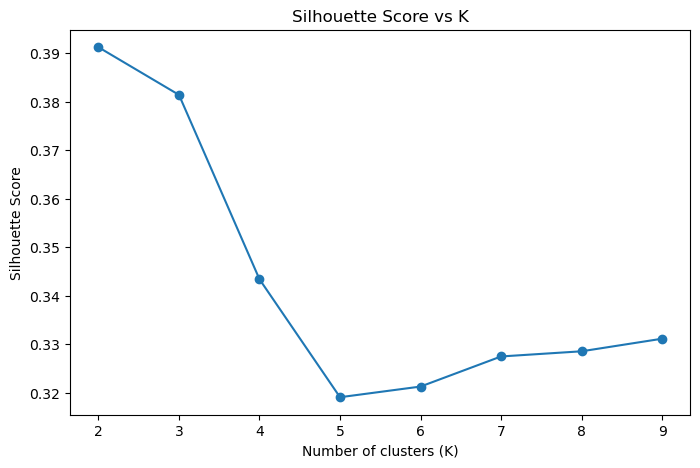

🥇 Best K: 2 (silhouette = 0.391)
🥈 Second best K: 3 (silhouette = 0.381)

=== Cluster summary for K = 2 ===
 Cluster  ClaimRate
       0   0.208379
       1   0.329859


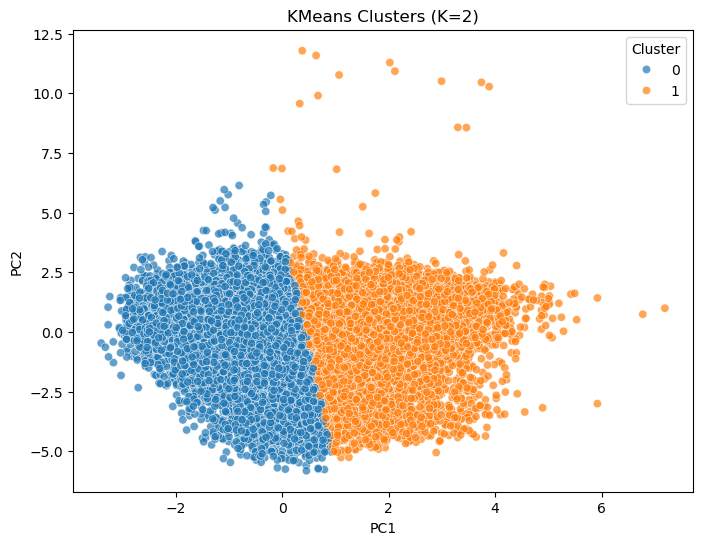


=== Cluster summary for K = 3 ===
 Cluster  ClaimRate
       0   0.391562
       1   0.317291
       2   0.079396


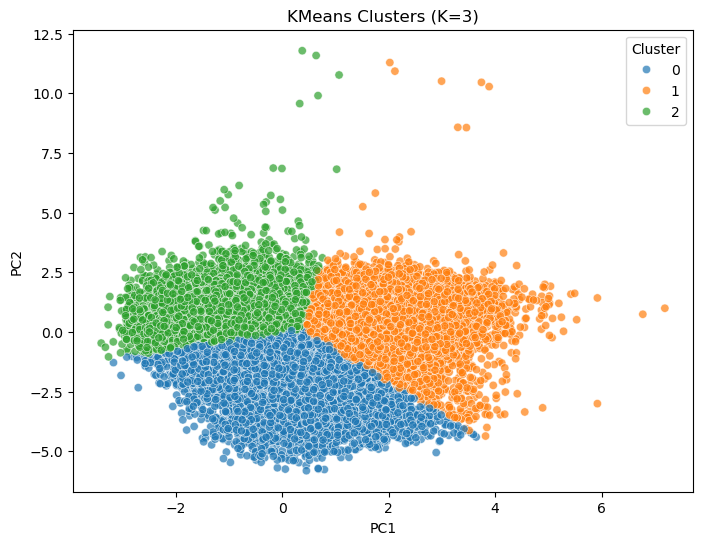


🥇 Best K cluster average claim rates:
   Cluster  ClaimRate
0        0   0.208379
1        1   0.329859

🥈 Second best K cluster average claim rates:
   Cluster  ClaimRate
0        0   0.391562
1        1   0.317291
2        2   0.079396


In [103]:

from sklearn.metrics import silhouette_score


# === 1️⃣ Sample the data for speed ===
sample = train.sample(frac=0.2, random_state=42).copy()
sample["ClaimRate"] = sample["ClaimNb"] / sample["Exposure"]

# === 2️⃣ Scale & PCA ===
features = ["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density", "Exposure"]
X_scaled = StandardScaler().fit_transform(sample[features])

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pcs, columns=["PC1", "PC2"])
pca_df["ClaimRate"] = sample["ClaimRate"].values

# === 3️⃣ Tune K using silhouette only ===
sil_scores = []
K_range = range(2, 10)

# Smaller subset for speed when computing silhouette
idx = np.random.choice(len(pcs), size=min(3000, len(pcs)), replace=False)
pcs_small = pcs[idx]

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pcs)
    sil = silhouette_score(pcs_small, kmeans.predict(pcs_small))
    sil_scores.append(sil)

# --- Plot silhouette scores ---
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# === Find top 2 best K values ===
sorted_scores = sorted(zip(K_range, sil_scores), key=lambda x: x[1], reverse=True)
best_k, best_score = sorted_scores[0]
second_k, second_score = sorted_scores[1]

print(f"🥇 Best K: {best_k} (silhouette = {best_score:.3f})")
print(f"🥈 Second best K: {second_k} (silhouette = {second_score:.3f})")

# === Helper function to cluster and summarize ===
def run_kmeans(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pcs)
    df = pca_df.copy()
    df["Cluster"] = labels

    cluster_stats = df.groupby("Cluster")["ClaimRate"].mean().reset_index()
    print(f"\n=== Cluster summary for K = {k} ===")
    print(cluster_stats.to_string(index=False))

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x="PC1", y="PC2", hue="Cluster", data=df,
        palette="tab10", alpha=0.7
    )
    plt.title(f"KMeans Clusters (K={k})")
    plt.show()

    return cluster_stats

# === 4️⃣ Run for best and second-best K ===
stats_best = run_kmeans(best_k)
stats_second = run_kmeans(second_k)

# === 5️⃣ Print summary comparison ===
print("\n🥇 Best K cluster average claim rates:")
print(stats_best)
print("\n🥈 Second best K cluster average claim rates:")
print(stats_second)
